# CPSC 483-01 Project 4 California Housing Dataset Due 4/8/2021
   ## Student Name: Fulya Kocaman
   ## Student ID: 803023878
   
 ## Project 4 Description:

In this project I used pandas, scikit-learn and NumPy to analyze a “real-world” dataset, see the importance of exploratory data analysis to understand the features, and experiment with regularization. I will also try to predict median values of homes from California Housing dataset. 

I implemented all of the required parts of this project and answered all of the experiment questions in the markdown cells of my code below. As a conclusion, I can say that my code seems to be working fine and predicting accurate results to the given experiment questions. 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.linear_model import Ridge

## Experiment 1: 
Load the the dataset

In [3]:
from sklearn.datasets import california_housing
data = california_housing.fetch_california_housing(as_frame=True)

C:\Users\fulya\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.datasets.california_housing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [43]:
df_features = pd.DataFrame(data= data.data, columns=data.feature_names)
df_features.head(5)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [5]:
df_features.shape

(20640, 8)

In [6]:
df_features.count()

MedInc        20640
HouseAge      20640
AveRooms      20640
AveBedrms     20640
Population    20640
AveOccup      20640
Latitude      20640
Longitude     20640
dtype: int64

In [7]:
df_target = pd.DataFrame(data= data.target, columns=data.target_names)
df_target.head(5)

,MedHouseVal
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422


In [8]:
df_target.shape

(20640, 1)

In [9]:
df_target.count()

MedHouseVal    20640
dtype: int64

## Experiment 2: 
Split the features and target values into separate training and test sets. Use 80% of the original data as a training set, and 20% for testing. To make sure that your results are reproducible, pass random_state=(2021-3-25).

In [10]:
 X_train, X_test, y_train, y_test = train_test_split(df_features, df_target, test_size=0.2, random_state=(2021-3-25))

In [11]:
X_train.size

132096

In [12]:
X_test.size

33024

In [13]:
y_train.size

16512

In [14]:
y_test.size

4128

## Experiment 3: 
Create and fit() an sklearn.linear_model.LinearRegression model using AveBedrms as a predictor of MedHouseVal.
Use the predict() method of the model to find the response for each value in the test set, and sklearn.metrics.mean_squared_error(), to find the training and test MSE. 

In [15]:
aveBedrms_train = X_train.loc[:,['AveBedrms']] 
reg = LinearRegression().fit(aveBedrms_train, y_train)

predictedResponses = reg.predict(aveBedrms_train)
mean_squared_error(y_train, predictedResponses)

1.3278477256171917

In [16]:
aveBedrms_test = X_test.loc[:,['AveBedrms']] 

predictedResponses = reg.predict(aveBedrms_test)
mean_squared_error(y_test, predictedResponses)

1.3323730132311569

## The result of Experiment 3: 
The training MSE for the AveBedrms attribute is 1.3278 and the test MSE for the AveBedrms attribute is 1.3324.

## Experiment 4: 
Use the score() method of the model to find the R2 values for the training and test sets.
Given the R2 scores, how well did our model do?

In [17]:
reg.score(aveBedrms_train, y_train)

0.0028776656256584987

In [18]:
reg.score(aveBedrms_test, y_test)


-0.0010086368172135263

## The result of Experiment 4: 
The $R^2$ value for the training set of the AveBedrms attribute is 0.0029 and the $R^2$ value for the test set of the AveBedrms attribute is -.0010. Since both training and test $R^2$s are near 0, the regression does not explain much of the variability in the MedHouseVal (house prices) using the AveBedrms feature. 

## Experiment 5: 
Use pandas.plotting.scatter_matrix() to plot each pair of features. Examine the row (or column) for MedHouseVal to see how it varies with each of the other features.

In [19]:
# Adding the MedHouseVal to the features data frame to examine how MedHouseVal varies with each of the other features
df_features['MedHouseVal'] =  df_target 

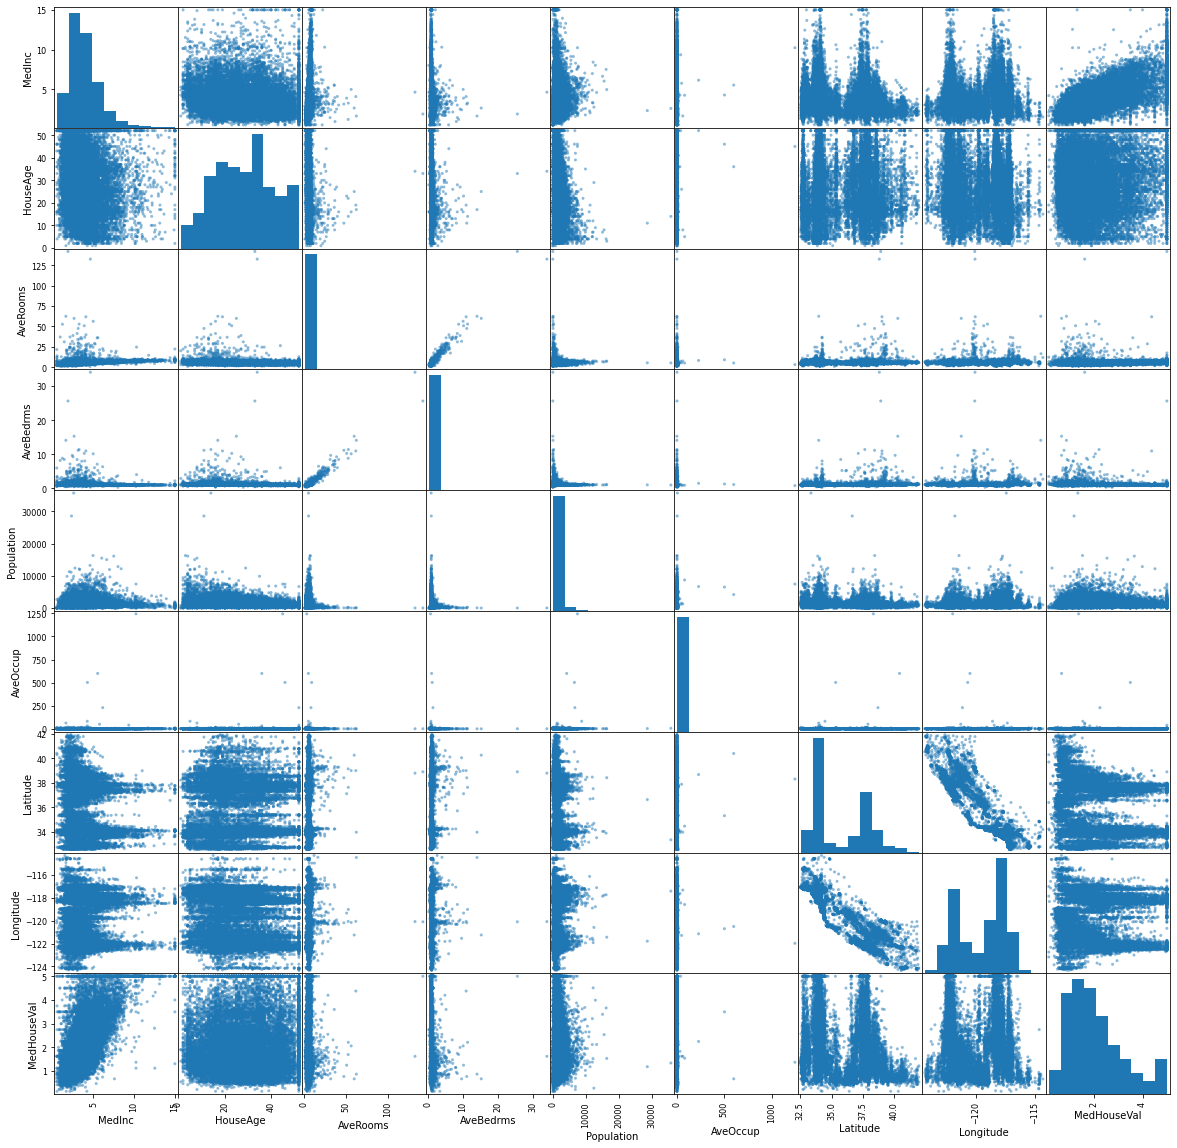

In [20]:
pd.plotting.scatter_matrix(df_features, alpha=0.5, figsize=(20,20))
plt.show()

## The result of Experiment 5:
The correlation matrix plot shows that MedInc appears to have a moderate positive linear correlation with MedHouseVal. Therefore, I would likely expect to see increase in the housing prices with a high median income.

## Experiment 6: 
Plot again using a sample() of 1%. How does the AveBedrms feature appear to affect MedHouseVal? How does this explain the value of R2 you found in experiment (4)?

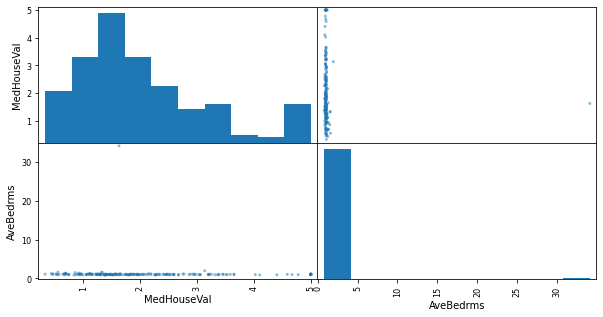

In [21]:
attributes = ["MedHouseVal", "AveBedrms"]
pd.plotting.scatter_matrix(df_features[attributes].sample(frac=0.01,replace=True, random_state=1), alpha=0.5, figsize=(10,5))
plt.show()

## The result of Experiment 6: 
This correlation matrix plot shows that the AveBedrms feauture appears to have little to no correlation with MedHouseVal. This result also match with the $R^2$ result of near 0 found in the experiment (4).


## Experiment 7:
Which features seem to have the strongest linear relationship with MedHouseVal?

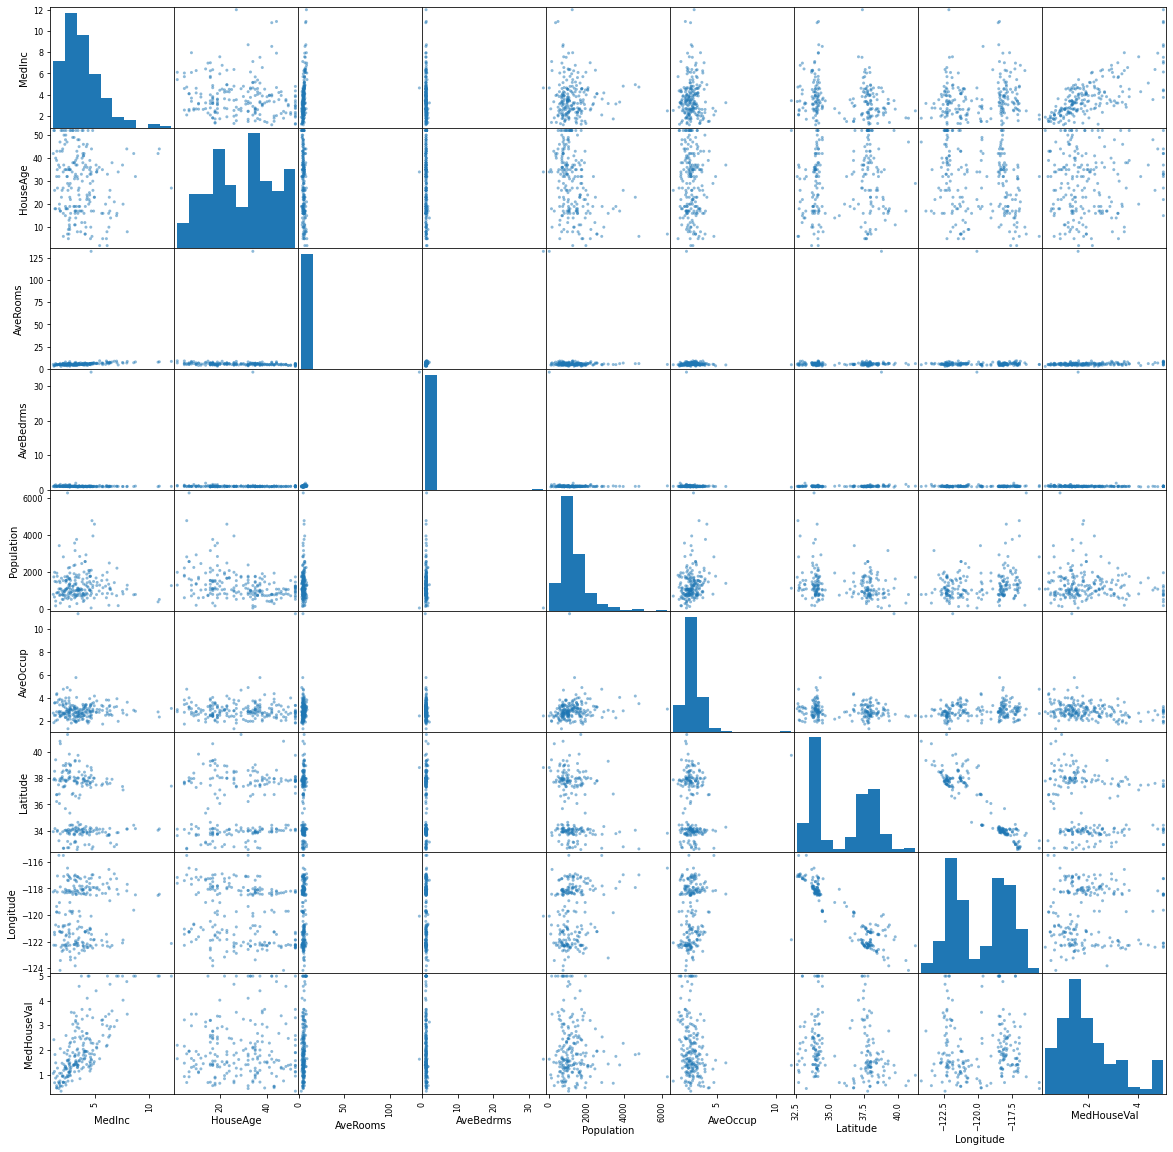

In [22]:
pd.plotting.scatter_matrix(df_features.sample(frac=0.01,replace=True, random_state=1), alpha=0.5, figsize=(20,20))
plt.show()

## The result of Experiment 7:
This correlation matrix plot shows that MedInc appears to have the strongest linear relationship with MedHouseVal.

## Experiment 8:
What relationship do you see between MedHouseVal and the Latitude and Longitude features? Look these values up on a map of the state and explain what you see.

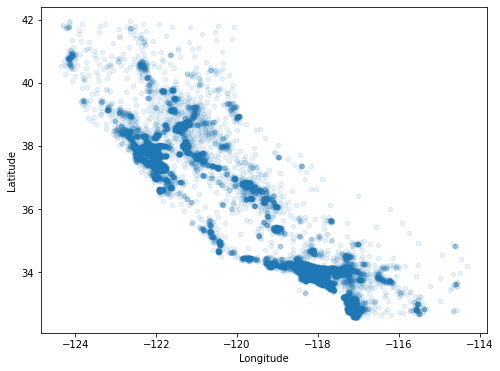

In [23]:
df_features.plot(kind="scatter", x="Longitude", y="Latitude", figsize = (8,6), alpha=0.1)

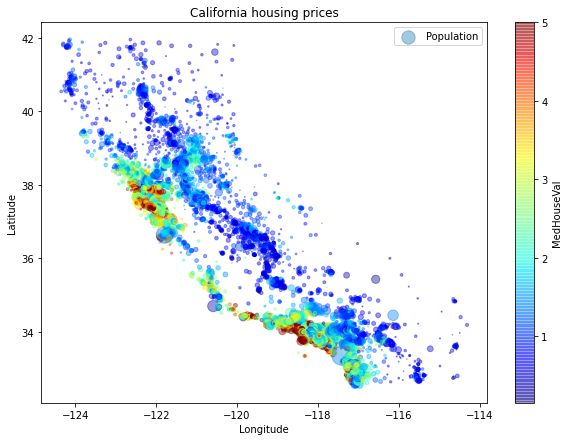

In [24]:
df_features.plot(kind="scatter", x="Longitude", y="Latitude", alpha=0.4,
    s=df_features["Population"]/100, label="Population", figsize=(10,7),
    c="MedHouseVal", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.title('California housing prices')
plt.legend()

## The result of Experiment 8:
From the California map above I can see that the housing prices (MedHouseVal) high near the coastal areas especially where
high latitude & low longitude or low latitude & high longitude because the attibutes Latitude and Longitude have a negative linear relationship as the plots show.

## Experiment 9:
Based on the correlation matrix, which feature is the strongest predictor of MedHouseVal? Does this match your answer in experiment (7)?

(0.0, 16.0, 0.0, 5.0)

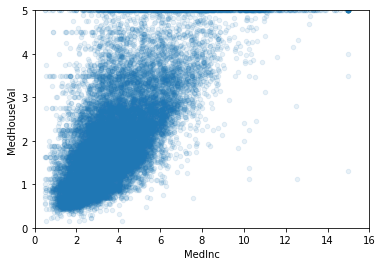

In [25]:
df_features.plot(kind="scatter", x="MedInc", y="MedHouseVal", alpha=0.1)
plt.axis([0, 16, 0, 5])

In [26]:
df_features.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
MedHouseVal,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


## The result of Experiment 9:
Since the correlation of MedInc with MedHouseVal is 0.6888, the MedInc appears to be the strongest predictor of MedHouseVal. Yes, this result matches with my answer in experiment (7).

## Experiment 10:
Repeat experiment (4) using the feature you found in the last experiment instead of AveBedrms. How well does this model score?

In [27]:
medInc_train = X_train.loc[:,['MedInc']] 

reg = LinearRegression().fit(medInc_train, y_train)

predictedResponses = reg.predict(medInc_train)
mean_squared_error(y_train, predictedResponses)

0.7083924846855346

In [28]:
reg.score(medInc_train,y_train)

0.468045955604915

In [29]:
medInc_test = X_test.loc[:,['MedInc']] 

predictedResponses = reg.predict(medInc_test)
mean_squared_error(y_test, predictedResponses)

0.67220120164671

In [30]:
reg.score(medInc_test,y_test)

0.49497685569639605

## The result of Experiment 10:
The results of the MedInc feature are that the training MSE is 0.7084, training $R^2$ is 0.4680, test MSE is 0.6722, and test $R^2$ is 0.4950. Both MSEs are lower and both $R^2$s are higher than the AveBedrms feature. $R^2$s of the MedInc feature are close to 0.5 which means that just almost 50% of the variablity is explained in MedHouseVal by a linear regression on MedInc. Therefore, MedInc is a better predictor than AveBedrms.

## Experiment 11:
Repeat experiment (10) using all 8 input features. How do the training and test MSEs for this model compare to that experiment?

In [31]:
reg = LinearRegression().fit(X_train, y_train)  

predictedResponseTraining = reg.predict(X_train)
mean_squared_error(y_train, predictedResponseTraining)

0.5296444457890023

In [32]:
reg.score(X_train,y_train)

0.6022734414610225

In [33]:
predictedResponseTest = reg.predict(X_test)
mean_squared_error(y_test, predictedResponseTest)

0.5047767239631304

In [34]:
reg.score(X_test,y_test)

0.6207624626635028

## The result of Experiment 11:
The results of using all 8 input features are that the training MSE is 0.5296, training $R^2$ is 0.6023, test MSE is 0.5048, and test $R^2$ is 0.6208. Both MSEs are lower than using only the MedInc feature and also both $R^2$s are higher than the one with using only the MedInc which means that about 62% of the variablity is explained in MedHouseVal by a linear regression on using all 8 input features. Therefore, using all 8 input features forms a better predictor than using only the MedInc feature.

## Experiment 12:
Use the fit_transform() method to create degree-2 polynomial and interaction terms for the entire set of 8 features, then fit a new linear model. Compare the training and test MSE to the previous model. Does adding polynomial terms lead to overfitting?

In [35]:
poly = PolynomialFeatures(degree = 2)
X_poly = poly.fit_transform(X_train) 

reg = LinearRegression().fit(X_poly, y_train) 

predictedResponseTrain = reg.predict(X_poly)
mean_squared_error(y_train, predictedResponseTrain)

0.424332225174454

In [36]:
reg.score(X_poly,y_train)

0.6813556774971726

In [37]:
predictedResponseTest = reg.predict(poly.fit_transform(X_test))
mean_squared_error(y_test, predictedResponseTest)

0.6463803040129776

In [38]:
reg.score(poly.fit_transform(X_test),y_test)

0.5143760339183097

## The result of Experiment 12:
The results of using degree-2 polynomial with interaction terms for the entire set of 8 features are that the training MSE is 0.4243 and test MSE is 0.6464. Its training MSE is lower than the trainig MSE of the linear fitting of using all 8 input feature whereas its test MSE is higher that the test MSE of the linear fitting of using all 8 input feature. Therefore, this behavior leads to overfitting. Once again, adding polynomial features to the model led to overfitting by having a lower training MSE and a higher test MSE.

## Experiment 13:
Use scikit-learn's L2-regularization as sklearn.linear_model.Ridge to fit the model to the degree-2 polynomial features. For now, leave 𝜆 set to the default value of 1.0. Recall that regularization requires all the same features to be on the same scale, so pass normalize=True.
Once again, compare the training and test MSE and R2 scores to the previous model. Does this model perform better?

In [39]:
rdg = Ridge(alpha=1.0, normalize=True)

rdg.fit(X_poly, y_train) 

rdg.score(X_poly, y_train)

0.5150893644697001

In [40]:
predictedResponseTrain = rdg.predict(X_poly)
mean_squared_error(y_train, predictedResponseTrain)

0.6457457247916447

In [41]:
rdg.score(poly.fit_transform(X_test), y_test)

0.5348933044620768

In [42]:
predictedResponseTest = rdg.predict(poly.fit_transform(X_test))
mean_squared_error(y_test, predictedResponseTest)

0.6190711914117147

## The result of Experiment 13:
The results of using regularization on the degree-2 polynomial features are that the training MSE is 0.6457, training $R^2$ is 0.5151, test MSE is 0.6191 and test $R^2$ is 0.5349. Since the large values of the coefficients of the previous polynomial model are penalized here, it caused the training MSE increased and the $R^2$ value decreased slightly. However, the test MSE was reduced from 0.6464 to 0.6191 and the $R^2$ score for the test set got increased from 0.5144 to 0.6191 comparing to the previous model with just the polynomial features added. Therefore, the polynomial model with L2-regularization applied performed better than the model with using just the degree-2 polynomial and interaction terms due to having a lower test MSE and higher $R^2$ score. 